In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler #allow us to scale the data
import tensorflow as tf
from imblearn.over_sampling import RandomOverSampler #to balance the data

In [2]:
# Importing the dataset
df = pd.read_csv('diabetes.csv')

In [3]:
#check dataset contents
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
len(df[df['Outcome']==1]), len(df[df['Outcome']==0])

(268, 500)

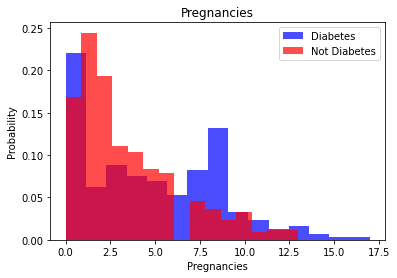

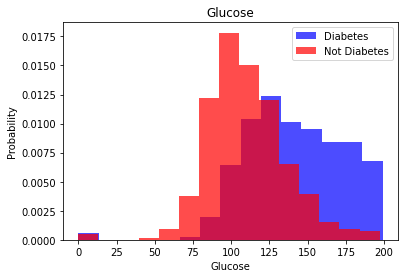

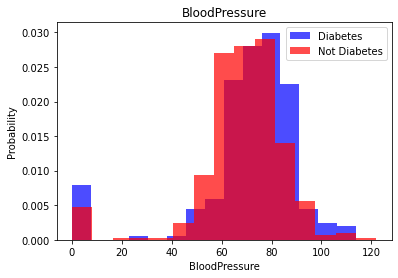

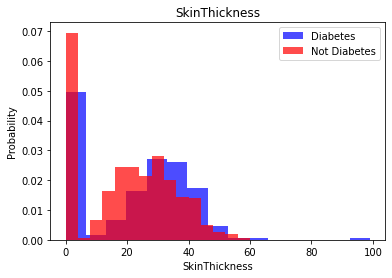

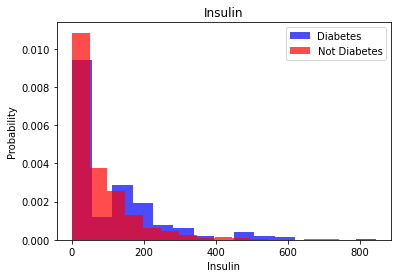

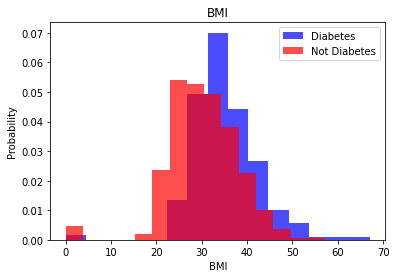

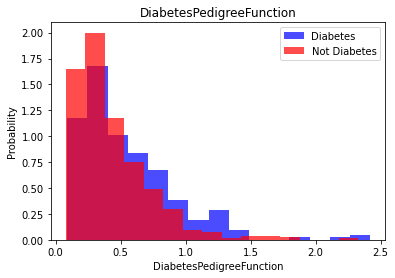

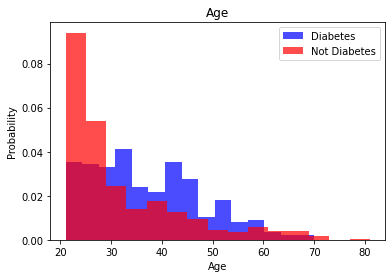

In [6]:
#plotting the dataset in histogram
for i in range(len(df.columns[:-1])):
    label = df.columns[i]
    plt.hist(df[df['Outcome']==1][label], color='blue', label='Diabetes', alpha=0.7, density=True, bins=15)
    plt.hist(df[df['Outcome']==0][label], color='red', label='Not Diabetes', alpha=0.7, density=True, bins=15)
    plt.title(label)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [7]:

#Split the dataset into training and test set, X and y
X = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

In [8]:
#Scaling the data
scaler = StandardScaler()
scaler.fit_transform(X)
data = np.hstack((X, np.reshape(y,(-1, 1)))) #horizontal stack
transformed_df = pd.DataFrame(data, columns=df.columns)

In [9]:
#trying to set no diabetes and diabetes size approximately same using random oversampling
over = RandomOverSampler()
X, y = over.fit_resample(X, y)
data = np.hstack((X, np.reshape(y,(-1, 1)))) #horizontal stack
transformed_df = pd.DataFrame(data, columns=df.columns)

In [10]:
len(transformed_df[transformed_df['Outcome']==1]), len(transformed_df[transformed_df['Outcome']==0])

(500, 500)

In [11]:
X_train, X_temp, y_train, y_temp =train_test_split(X, y, test_size=0.4, random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

In [12]:
#Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation=tf.nn.relu),
    tf.keras.layers.Dense(16, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
    ])

In [13]:
#Selecting the optimizer
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              loss = tf.keras.losses.BinaryCrossentropy(),
                metrics = ['accuracy'])

In [14]:
#Evaluating the model
model.evaluate(X_valid, y_valid)

7/7 [==============================] - 2s 5ms/step - loss: 29.0134 - accuracy: 0.5350


[29.013391494750977, 0.5350000262260437]

In [15]:
#Fit the model
model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), batch_size=16)

Epoch 1/20
38/38 [==============================] - 1s 3ms/step - loss: 22.3728 - accuracy: 0.5033 - val_loss: 11.1806 - val_accuracy: 0.5150
Epoch 2/20
38/38 [==============================] - 0s 2ms/step - loss: 7.2828 - accuracy: 0.5350 - val_loss: 2.8455 - val_accuracy: 0.5650
Epoch 3/20
38/38 [==============================] - 0s 2ms/step - loss: 1.7226 - accuracy: 0.5583 - val_loss: 1.0081 - val_accuracy: 0.5750
Epoch 4/20
38/38 [==============================] - 0s 2ms/step - loss: 1.0427 - accuracy: 0.5733 - val_loss: 0.9839 - val_accuracy: 0.5800
Epoch 5/20
38/38 [==============================] - 0s 2ms/step - loss: 0.9359 - accuracy: 0.5883 - val_loss: 0.8969 - val_accuracy: 0.5900
Epoch 6/20
38/38 [==============================] - 0s 2ms/step - loss: 0.8745 - accuracy: 0.5850 - val_loss: 0.8427 - val_accuracy: 0.6100
Epoch 7/20
38/38 [==============================] - 0s 2ms/step - loss: 0.8241 - accuracy: 0.6017 - val_loss: 0.8181 - val_accuracy: 0.5800
Epoch 8/20
38/38 [

In [16]:
#Evaluating the model
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.6255 - accuracy: 0.6600


[0.6255164742469788, 0.6600000262260437]